In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv("prozekt_car_sales.csv")

In [3]:
df.head()

,NO_NAME,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,569520,3,0,0,0,0,2,0.629027,1,0,0,1,10238,12000.0,0,0,0,0,0
1,1,750365,0,1,0,0,1,1,0.357757,0,1,0,0,10238,16000.0,0,0,0,0,1
2,2,199901,0,0,0,0,0,3,0.493146,1,1,0,0,10238,11000.0,0,0,0,0,0
3,3,478866,0,1,0,0,2,3,0.206013,1,1,0,1,32765,11000.0,0,0,0,0,0
4,4,731664,1,1,0,1,1,3,0.388366,1,1,0,0,32765,12000.0,0,2,0,1,1


In [4]:
df.shape

(10000, 20)

In [5]:
df.isnull().sum()

NO_NAME                0
ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df = df.drop('NO_NAME', axis=1)

In [8]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,3,0,0,0,0,2,0.629027,1,0,0,1,10238,12000.0,0,0,0,0,0
1,750365,0,1,0,0,1,1,0.357757,0,1,0,0,10238,16000.0,0,0,0,0,1
2,199901,0,0,0,0,0,3,0.493146,1,1,0,0,10238,11000.0,0,0,0,0,0
3,478866,0,1,0,0,2,3,0.206013,1,1,0,1,32765,11000.0,0,0,0,0,0
4,731664,1,1,0,1,1,3,0.388366,1,1,0,0,32765,12000.0,0,2,0,1,1


## EDA

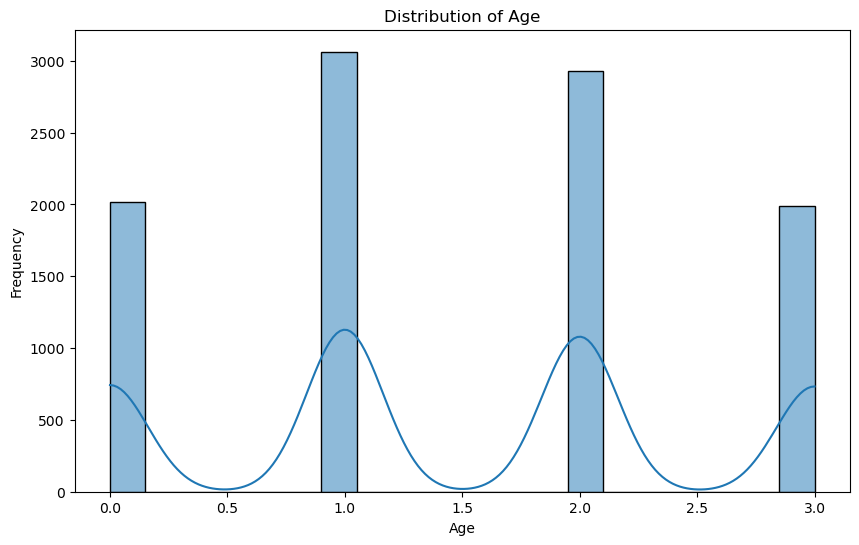

In [9]:
# Plot the distribution of age

plt.figure(figsize=(10,6))
sn.histplot(df['AGE'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

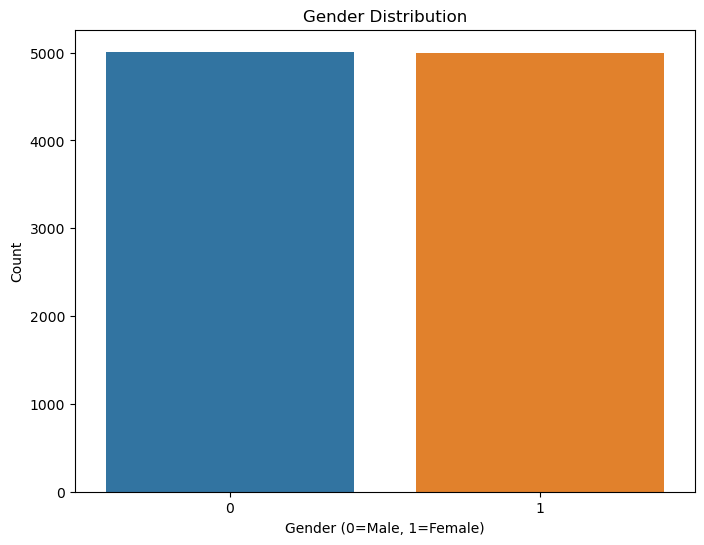

In [10]:
# Plot the count of each gender

plt.figure(figsize=(8,6))
sn.countplot(x='GENDER', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Count')
plt.show()

<Figure size 800x600 with 0 Axes>

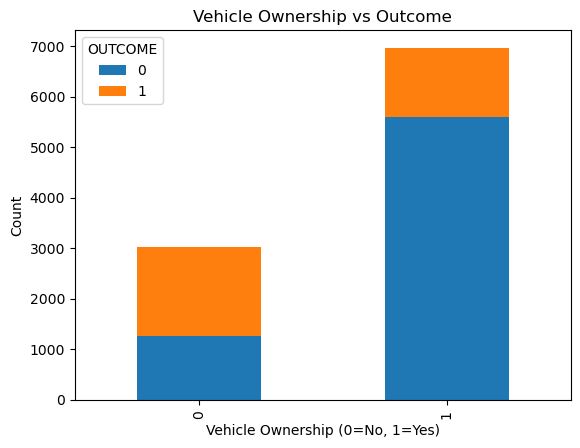

In [11]:
# Create a stacked bar plot of vehicle ownership vs outcome

plt.figure(figsize=(8,6))
pd.crosstab(df['VEHICLE_OWNERSHIP'], df['OUTCOME']).plot(kind='bar', stacked=True)
plt.title('Vehicle Ownership vs Outcome')
plt.xlabel('Vehicle Ownership (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

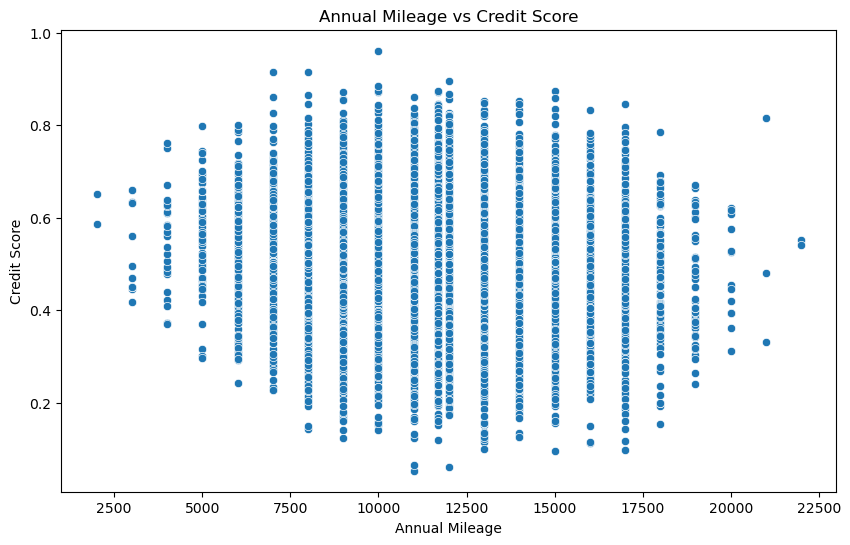

In [12]:
# Plot scatter plot of Annual Mileage vs Credit Score

plt.figure(figsize=(10,6))
sn.scatterplot(x='ANNUAL_MILEAGE', y='CREDIT_SCORE', data= df)
plt.title('Annual Mileage vs Credit Score')
plt.xlabel('Annual Mileage')
plt.ylabel('Credit Score')
plt.show()

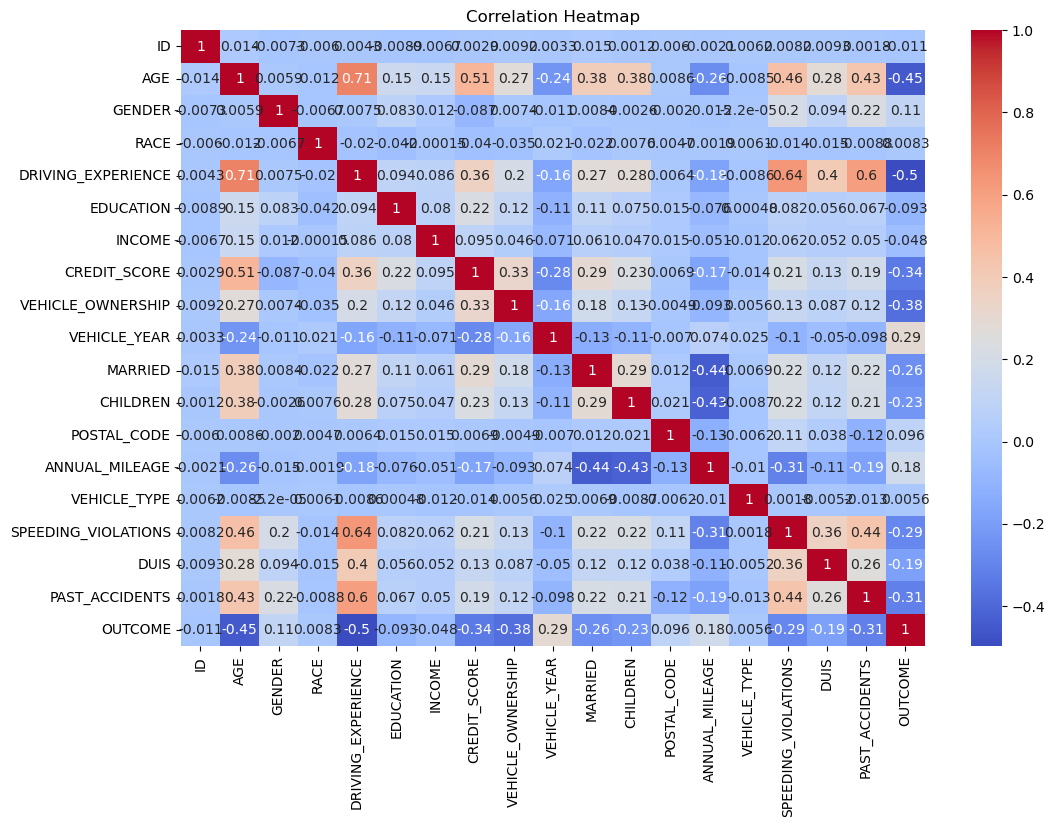

In [13]:
# Plot the heatmap to show correlation between numeric features
plt.figure(figsize=(12,8))
sn.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

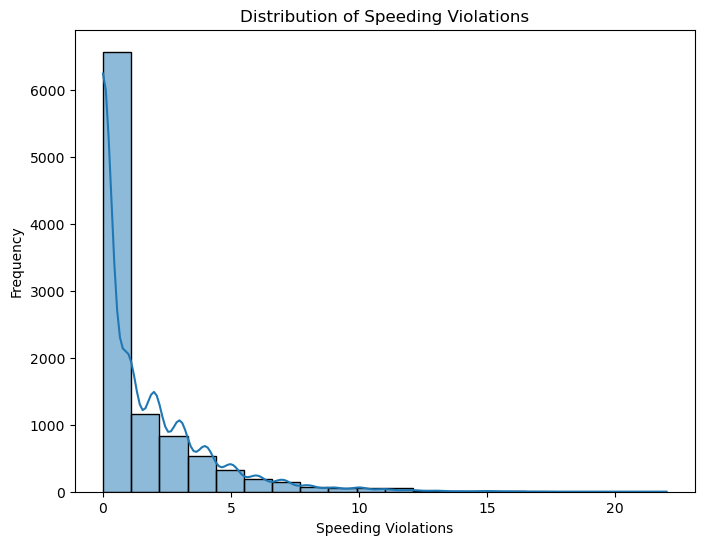

In [14]:
# Plot distribution of Speeding Violations

plt.figure(figsize=(8,6))
sn.histplot(df['SPEEDING_VIOLATIONS'], bins=20, kde=True)
plt.title('Distribution of Speeding Violations')
plt.xlabel('Speeding Violations')
plt.ylabel('Frequency')
plt.show()

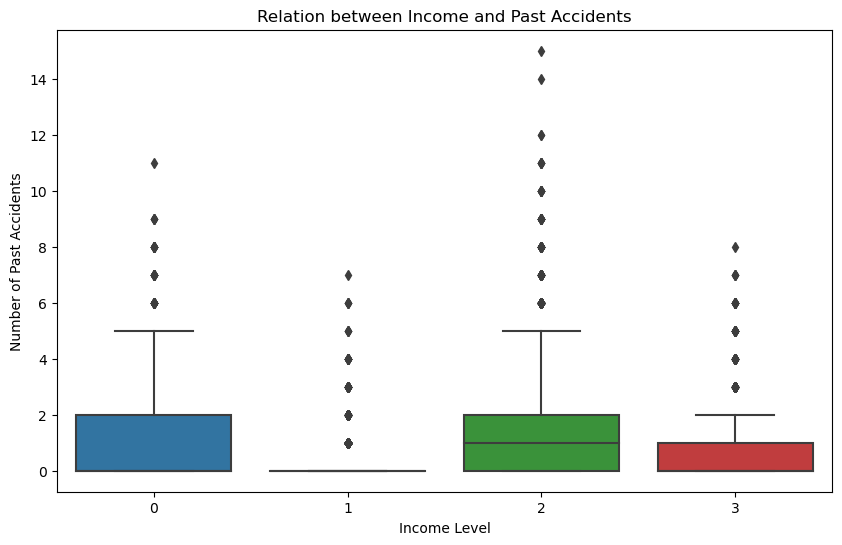

In [15]:
# Create the box plot
plt.figure(figsize=(10,6))
sn.boxplot(x='INCOME', y='PAST_ACCIDENTS', data=df)

plt.title('Relation between Income and Past Accidents')
plt.xlabel('Income Level')
plt.ylabel('Number of Past Accidents')

plt.show()

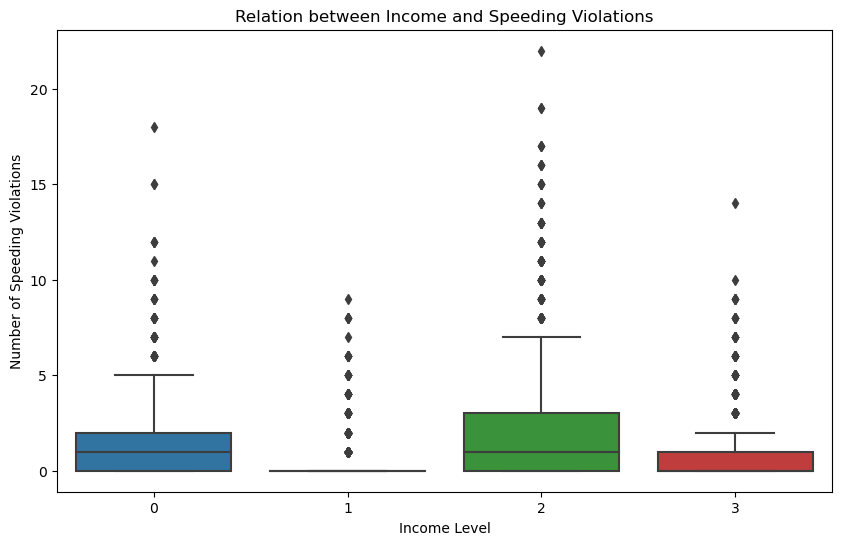

In [16]:
# Create the box plot
plt.figure(figsize=(10,6))
sn.boxplot(x='INCOME', y='SPEEDING_VIOLATIONS', data= df)

# Add titles and labels
plt.title('Relation between Income and Speeding Violations')
plt.xlabel('Income Level')
plt.ylabel('Number of Speeding Violations')

# Show the plot
plt.show()

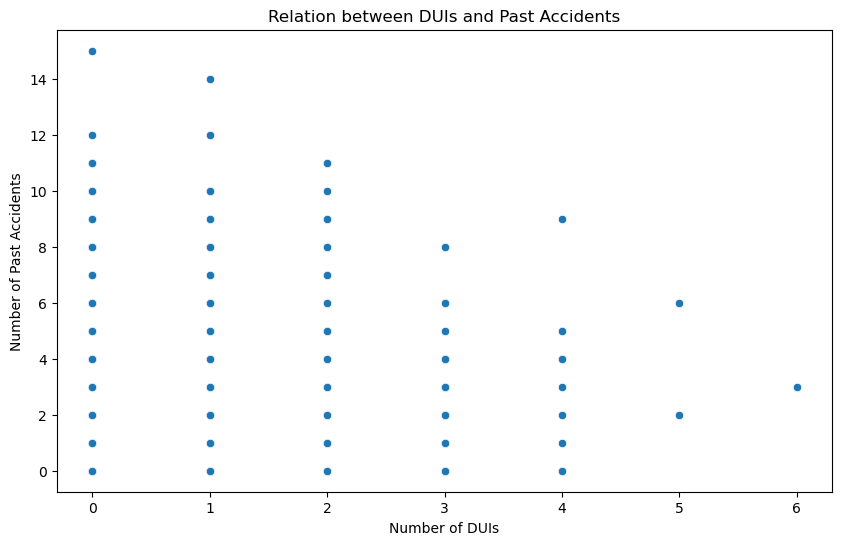

In [17]:
# Create the scatter plot
plt.figure(figsize=(10,6))
sn.scatterplot(x='DUIS', y='PAST_ACCIDENTS', data= df)

# Add titles and labels
plt.title('Relation between DUIs and Past Accidents')
plt.xlabel('Number of DUIs')
plt.ylabel('Number of Past Accidents')

# Show the plot
plt.show()

## Feature Engineering

In [18]:
# Using pandas get_dummies for one-hot encoding
df_encoded = pd.get_dummies(df, columns=['GENDER', 'VEHICLE_TYPE', 'EDUCATION', 'RACE'], drop_first=True)

# df_encoded.head()

,ID,AGE,DRIVING_EXPERIENCE,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,GENDER_1,VEHICLE_TYPE_1,EDUCATION_1,EDUCATION_2,RACE_1
0,569520,3,0,2,0.629027,1,0,0,1,10238,12000.0,0,0,0,0,0,0,0,0,0
1,750365,0,0,1,0.357757,0,1,0,0,10238,16000.0,0,0,0,1,1,0,1,0,0
2,199901,0,0,3,0.493146,1,1,0,0,10238,11000.0,0,0,0,0,0,0,0,0,0
3,478866,0,0,3,0.206013,1,1,0,1,32765,11000.0,0,0,0,0,1,0,0,1,0
4,731664,1,1,3,0.388366,1,1,0,0,32765,12000.0,2,0,1,1,1,0,1,0,0


In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

df['DRIVING_EXPERIENCE_ENCODED'] = label_encoder.fit_transform(df['DRIVING_EXPERIENCE'])

df['INCOME_ENCODED'] = label_encoder.fit_transform(df['INCOME'])

,DRIVING_EXPERIENCE,DRIVING_EXPERIENCE_ENCODED,INCOME,INCOME_ENCODED
0,0,0,2,2
1,0,0,1,1
2,0,0,3,3
3,0,0,3,3
4,1,1,3,3


In [20]:
# Interaction between INCOME and CREDIT_SCORE
df['Income_Credit_Interaction'] = df['INCOME'] * df['CREDIT_SCORE']

# Interaction between AGE and DRIVING_EXPERIENCE
df['Age_DrivingExperience_Interaction'] = df['AGE'] * df['DRIVING_EXPERIENCE']

# Combine SPEEDING_VIOLATIONS and PAST_ACCIDENTS into a new feature "Total Violations"
df['Total_Violations'] = df['SPEEDING_VIOLATIONS'] + df['PAST_ACCIDENTS']

,INCOME,CREDIT_SCORE,Income_Credit_Interaction,AGE,DRIVING_EXPERIENCE,Age_DrivingExperience_Interaction,SPEEDING_VIOLATIONS,PAST_ACCIDENTS,Total_Violations
0,2,0.629027,1.258055,3,0,0,0,0,0
1,1,0.357757,0.357757,0,0,0,0,0,0
2,3,0.493146,1.479437,0,0,0,0,0,0
3,3,0.206013,0.618039,0,0,0,0,0,0
4,3,0.388366,1.165098,1,1,1,2,1,3


In [21]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the features you want to scale
features_to_scale = ['CREDIT_SCORE', 'ANNUAL_MILEAGE']

# Apply StandardScaler
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display the scaled features
df[features_to_scale].head()


,CREDIT_SCORE,ANNUAL_MILEAGE
0,0.853426,0.113057
1,-1.183534,1.605576
2,-0.166905,-0.260073
3,-2.322978,-0.260073
4,-0.953694,0.113057


In [23]:
# Binning AGE into categories
df['AGE_BIN'] = pd.cut(df['AGE'], bins=[0, 25, 50, 100], labels=['Young', 'Mid-Age', 'Old'])

# Binning INCOME into low, medium, high categories
df['INCOME_BIN'] = pd.cut(df['INCOME'], bins=[0, 1, 3, 5], labels=['Low', 'Medium', 'High'])

# Binning CREDIT_SCORE into poor, average, good
df['CREDIT_SCORE_BIN'] = pd.cut(df['CREDIT_SCORE'], bins=[0, 0.3, 0.7, 1], labels=['Poor', 'Average', 'Good'])

,AGE,AGE_BIN
0,3,Young
1,0,NaN
2,0,NaN
3,0,NaN
4,1,Young


In [ ]:
df[['AGE', 'AGE_BIN', 'INCOME', 'INCOME_BIN', 'CREDIT_SCORE', 'CREDIT_SCORE_BIN']].head() 

In [26]:
from sklearn.model_selection import train_test_split

# Define the target variable 
X = df.drop('OUTCOME', axis=1)  # Features
y = df['OUTCOME']  # Target

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(f'Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}')

Training set shape: (8000, 26), Testing set shape: (2000, 26)


## ML

In [28]:
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# categorical and numerical columns
categorical_features = ['GENDER', 'RACE', 'EDUCATION']  
numeric_features = ['AGE', 'INCOME', 'CREDIT_SCORE', 'ANNUAL_MILEAGE']  

# Define transformers for both categorical and numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Scaling
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [29]:
# Logistic Regression Pipeline
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# XGBoost Pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

In [30]:
# List of pipelines
pipelines = [
    ('Logistic Regression', logreg_pipeline),
    ('Random Forest', rf_pipeline),
    ('XGBoost', xgb_pipeline)
]

# Train and evaluate each model
for name, pipeline in pipelines:
    print(f"Training and evaluating {name}...")
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

Training and evaluating Logistic Regression...
Logistic Regression Accuracy: 0.7800 (+/- 0.0092)
Training and evaluating Random Forest...
Random Forest Accuracy: 0.7325 (+/- 0.0076)
Training and evaluating XGBoost...
XGBoost Accuracy: 0.7642 (+/- 0.0051)


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(logreg_pipeline, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_lr.fit(X_train, y_train)

# Best parameters and best score
print(f'Best parameters for Logistic Regression: {grid_search_lr.best_params_}')
print(f'Best cross-validation accuracy for Logistic Regression: {grid_search_lr.best_score_}')

/Users/snehabarve/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/snehabarve/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/snehabarve/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/snehabarve/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/snehabarve/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/snehabarve/anaconda3/lib/python3.

Best parameters for Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best cross-validation accuracy for Logistic Regression: 0.78


In [34]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(xgb_pipeline, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, n_iter=50, random_state=42)

# Fit the randomized search to the data
random_search_xgb.fit(X_train, y_train)

# Best parameters and best score
print(f'Best parameters for XGBoost: {random_search_xgb.best_params_}')
print(f'Best cross-validation accuracy for XGBoost: {random_search_xgb.best_score_}')

Best parameters for XGBoost: {'classifier__subsample': 0.6, 'classifier__n_estimators': 300, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.01, 'classifier__colsample_bytree': 0.6}
Best cross-validation accuracy for XGBoost: 0.7838749999999999


In [35]:
# Logistic Regression - Final Model Training
best_logreg_model = grid_search_lr.best_estimator_
best_logreg_model.fit(X_train, y_train)
y_pred_lr = best_logreg_model.predict(X_test)


# XGBoost - Final Model Training
best_xgb_model = random_search_xgb.best_estimator_
best_xgb_model.fit(X_train, y_train)
y_pred_xgb = best_xgb_model.predict(X_test)

Logistic Regression Test Set Evaluation
Accuracy: 0.7755
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1367
           1       0.69      0.53      0.60       633

    accuracy                           0.78      2000
   macro avg       0.75      0.71      0.72      2000
weighted avg       0.77      0.78      0.77      2000

XGBoost Test Set Evaluation
Accuracy: 0.7815
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1367
           1       0.72      0.51      0.59       633

    accuracy                           0.78      2000
   macro avg       0.76      0.71      0.72      2000
weighted avg       0.77      0.78      0.77      2000



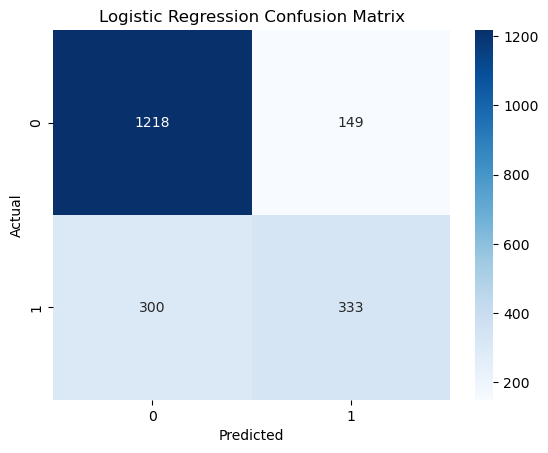

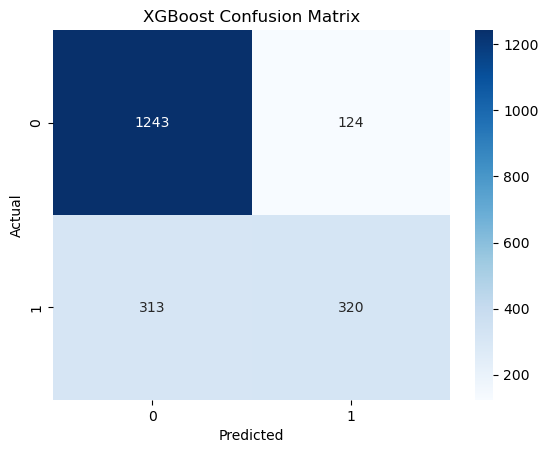

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression Evaluation
print("Logistic Regression Test Set Evaluation")
print(f'Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}')
print(classification_report(y_test, y_pred_lr))

# XGBoost Evaluation
print("XGBoost Test Set Evaluation")
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}')
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sn.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sn.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
import joblib

joblib.dump(best_logreg_model, 'logistic_regression_model.pkl')
joblib.dump(best_xgb_model, 'xgboost_model.pkl') 

['xgboost_model.pkl']